In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [11]:
data=pd.read_csv('/content/Titanic-Dataset.xls')

In [4]:
data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0




Столбец Age дозаполним медианным значением возраста.

Удалим несколько лишних столбцов


In [12]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [13]:
# Удалим ненужные столбцы - PassengerId тоже не несет смысла для решения нашей задачи
data.drop(['PassengerId', 'Cabin', 'Name','Embarked',"Ticket"],axis = 1,inplace = True) # inplace = True - означает перезаписать переменную data

In [14]:
labelsToEncode=['Sex']
for label in labelsToEncode:
  le = LabelEncoder()
  data[label] = le.fit_transform(data[label])

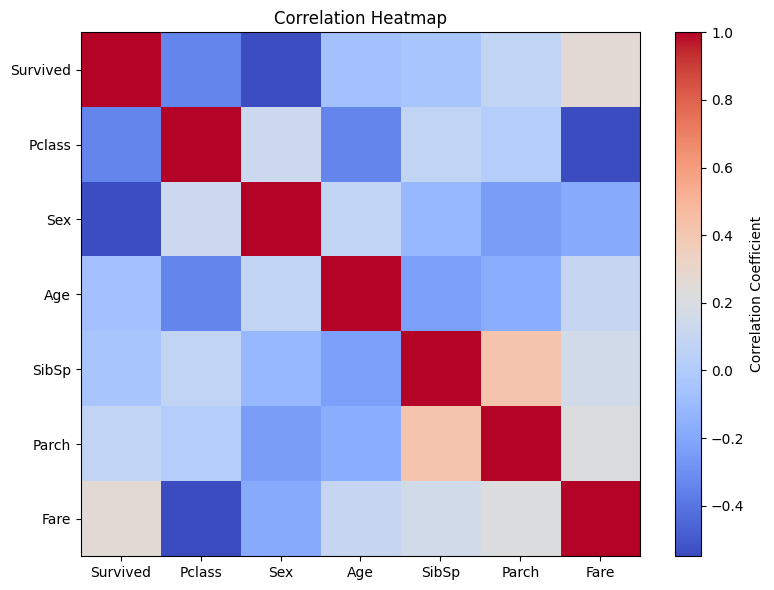

In [15]:
corr_matrix=data.corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [16]:
X = data.drop(['Survived'],axis=1)
Y = data['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=4)

1. Логистическая регрессия (Logistic Regression)

Особенности:

    Линейная модель для бинарной и многоклассовой классификации

    Выдает вероятности принадлежности к классам

    Быстрая обучение и предсказание

    Хорошая интерпретируемость

Точность
0.8246268656716418


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

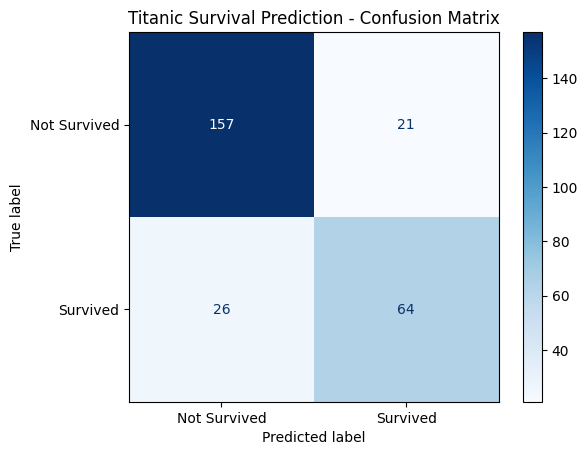

In [17]:
model = LogisticRegression(
    penalty='l2',           # тип регуляризации: 'l1', 'l2', 'elasticnet', 'none'
    C=1.0,                  # обратная сила регуляризации (меньше = сильнее регуляризация)
    solver='lbfgs',         # алгоритм оптимизации
    max_iter=200,           # максимальное количество итераций
    multi_class='auto'      # стратегия для многоклассовой классификации
)
model.fit(X_train, Y_train)
y_predLogistic = model.predict(X_test)
accuracyLogistic = accuracy_score(Y_test, y_predLogistic)

cmLogistic = confusion_matrix(Y_test, y_predLogistic)

print("Точность")
print(accuracyLogistic)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cmLogistic,
                              display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title('Titanic Survival Prediction - Confusion Matrix')
plt.show()


2. Случайный лес (Random Forest)

Особенности:

    Ансамблевый метод на основе деревьев

    Устойчив к переобучению

    Не требует масштабирования признаков

    Может оценивать важность признаков

Точность
0.8582089552238806


<Figure size 800x600 with 0 Axes>

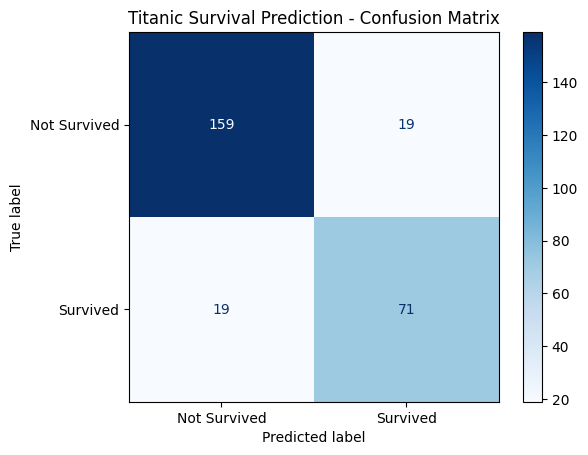

In [24]:
model = RandomForestClassifier(
    n_estimators=100,       # количество деревьев
    max_depth=None,         # максимальная глубина деревьев
    min_samples_split=4,    # минимальное количество samples для разделения
    min_samples_leaf=3,     # минимальное количество samples в листе
    max_features=2,    # количество признаков для рассмотрения при разделении
    bootstrap=True          # использовать ли bootstrap sampling
)
model.fit(X_train, Y_train)
y_predForest = model.predict(X_test)
accuracyForest = accuracy_score(Y_test, y_predForest)

cmForest = confusion_matrix(Y_test, y_predForest)

print("Точность")
print(accuracyForest)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cmForest,
                              display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title('Titanic Survival Prediction - Confusion Matrix')
plt.show()

3. K-ближайших соседей (K-Nearest Neighbors)

Особенности:

    Метод на основе экземпляров (instance-based)

    Не делает предположений о распределении данных

    Чувствителен к масштабированию и шуму

    Медленный при предсказании на больших данных

Точность
0.7611940298507462


<Figure size 800x600 with 0 Axes>

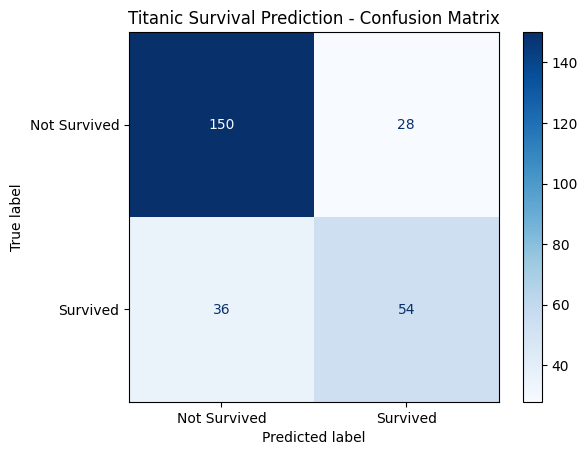

In [35]:
model = KNeighborsClassifier(
    n_neighbors=13,          # количество соседей
    weights='distance',      # вес голосов: 'uniform' или 'distance'
    algorithm='auto',       # алгоритм поиска соседей
    p=1,                    # параметр для метрики Минковского (1 - манхэттен, 2 - евклидова)
    metric='minkowski'      # метрика расстояния
)
model.fit(X_train, Y_train)
y_predNeighbors = model.predict(X_test)
accuracyNeighbors = accuracy_score(Y_test, y_predNeighbors)

cmNeighbors = confusion_matrix(Y_test, y_predNeighbors)

print("Точность")
print(accuracyNeighbors)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cmNeighbors,
                              display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title('Titanic Survival Prediction - Confusion Matrix')
plt.show()